<a href="https://colab.research.google.com/github/sarathkumar271002/Project0-Diabetes_prediction/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

In [51]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")

# **Data observation**

In [52]:
df.shape

(100000, 9)

In [53]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [55]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [57]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
gender,100000,3,Female,58552
smoking_history,100000,6,No Info,35816


In [58]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [59]:
df.duplicated().sum()

np.int64(3854)

# **Correlation**

In [60]:
df.select_dtypes(exclude='object').corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [61]:
correlation_matrix = df.select_dtypes(exclude='object').corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='RdBu', title='Correlation Matrix')
fig.show()

# **Data preprocessing**

Handling Unrequired data

In [62]:
df.duplicated().sum()

np.int64(3854)

In [63]:
df.drop_duplicates(keep='first', inplace=True)

In [64]:
df.duplicated().sum()

np.int64(0)

Handling Missing Values

In [65]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


# **Encoding**

In [66]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [67]:
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2})
df['smoking_history'] = df['smoking_history'].replace({'never': 0, 'No Info': 1, 'current': 2, 'former': 3, 'not current': 4, 'ever': 5})

# **Model Training**

In [68]:
x1 = df['blood_glucose_level']
y = df['diabetes']

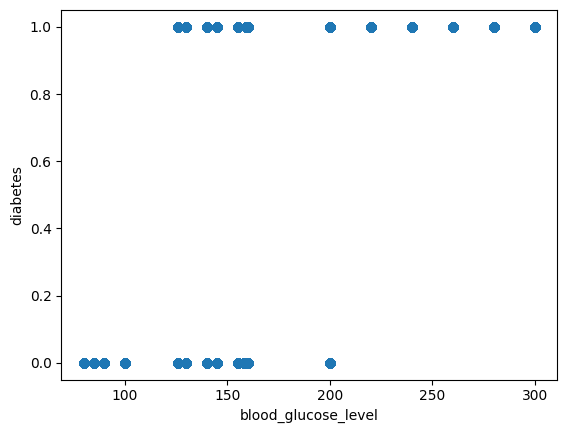

In [70]:
plt.scatter(x1, y)
plt.xlabel('blood_glucose_level')
plt.ylabel('diabetes')
plt.show()

In [71]:
sns.set()

In [76]:
x = sm.add_constant(x1)
result = sm.Logit(y, x).fit()

Optimization terminated successfully.
         Current function value: 0.220020
         Iterations 8


In [77]:
def myfun(x,b0,b1):
  return np.array(np.exp(b0+b1*x)/(1+np.exp(b0+b1*x)))

In [79]:
yhat=np.sort(myfun(x1,result.params[0],result.params[1]))
x_=np.sort(np.array(x1))

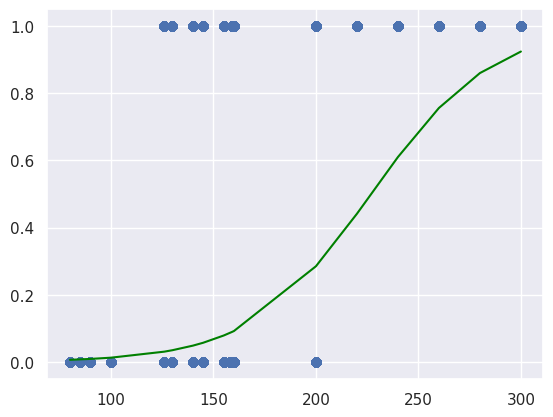

In [81]:
plt.scatter(x1, y)
plt.plot(x_, yhat, color='green')
plt.show()

In [82]:
result.predict()

array([0.04876399, 0.00655022, 0.08662992, ..., 0.07885246, 0.01289361,
       0.00919493])

In [83]:
result.pred_table()

array([[87664.,     0.],
       [ 5818.,  2664.]])

In [85]:
cm_df=pd.DataFrame(result.pred_table())
cm_df.columns=["predicted 0","predicted 1"]
cm_df=cm_df.rename(index={0:"actual 0",1:"actual 1"})
cm_df

,predicted 0,predicted 1
actual 0,87664.0,0.0
actual 1,5818.0,2664.0


In [86]:
cm=np.array(cm_df)
ac = (cm[0,0]+cm[1,1])/cm.sum()
ac*100

np.float64(93.94878622095563)

In [87]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               diabetes   No. Observations:                96146
Model:                          Logit   Df Residuals:                    96144
Method:                           MLE   Df Model:                            1
Date:                Tue, 29 Jul 2025   Pseudo R-squ.:                  0.2627
Time:                        16:28:36   Log-Likelihood:                -21154.
converged:                       True   LL-Null:                       -28690.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -7.7562      0.060   -129.617      0.000      -7.874      -7.639
blood_glucose_level     0.0342      0.000     99.749      0.000       0.034       0.035
=======================================================================================
"""